# Task 1: Linear Regression Task

**Objective:**

You will be working on linear regression algorithms in the following tasks, focusing on a specific use case.

**Use Case:**

* Find a use case that aligns with your mission.
* **Important:**
    * The use case must **NOT** be generic.
    * The use case must **NOT** be the house prediction use case (covered extensively in class). Choosing this use case will result in an immediate zero grade for the entire assignment.

**Tasks:**

1. **Find a Dataset:**
   * Find a dataset related to your chosen use case.
   * Explore sources like Kaggle, Google Datasets, and data.gov.
   * The dataset **MUST** be something other than house price prediction.

2. **Build and Optimize a Linear Regression Model:**
   * Create and optimize a linear regression model using gradient descent.
   * Utilize the scikit-learn library.

3. **Plot the Loss Curve:**
   * Plot the loss curve for both test and train data.

4. **Compare Models:**
   * Compare the performance of:
      * Linear regression model
      * Decision trees
      * Random forest
   * Include the code for all three models.

5. **Save the Best Model:**
   * Save the best-performing model based on the loss metric.

6. **Create a Prediction Script:**
   * Create a script that uses the best model to make a prediction that will be used in Task 2.

### Use Case: Predicting Student GPA

**Goal:** Predicting the GPA of students based on various factors such as study time, parental education, and extracurricular activities to provide actionable insights for educators to improve student performance.

**Why This Use Case:** The use case is directly aligned with my mission in education with the goal of improving student outcomes. Predicting GPA helps in identifying students who may require additional academic support and intervention, thus enabling more personalized learning pathways. Additionally, understanding the correlation between various features and GPA can help educators focus on the most influential factors to improve a supportive learning environment.

This use case is non-generic because it focuses on personalized academic improvement rather than general academic performance predictions. It targets specific educational interventions for student success, which is critical for data-driven decision-making in educational contexts.


## Dataset Description

**Student ID**

* **StudentID:** A unique identifier assigned to each student (1001 to 3392).

**Demographic Details**

* **Age:** The age of the students ranges from 15 to 18 years.
* **Gender:** Gender of the students, where 0 represents Male and 1 represents Female.
* **Ethnicity:** The ethnicity of the students, coded as follows:
    * 0: Caucasian
    * 1: African American
    * 2: Asian
    * 3: Other
* **ParentalEducation:** The education level of the parents, coded as follows:
    * 0: None
    * 1: High School
    * 2: Some College
    * 3: Bachelor's
    * 4: Higher

**Study Habits**

* **StudyTimeWeekly:** Weekly study time in hours, ranging from 0 to 20.
* **Absences:** Number of absences during the school year, ranging from 0 to 30.
* **Tutoring:** Tutoring status, where 0 indicates No and 1 indicates Yes.

**Parental Involvement**

* **ParentalSupport:** The level of parental support, coded as follows:
    * 0: None
    * 1: Low
    * 2: Moderate
    * 3: High
    * 4: Very High

**Extracurricular Activities**

* **Extracurricular:** Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
* **Sports:** Participation in sports, where 0 indicates No and 1 indicates Yes.
* **Music:** Participation in music activities, where 0 indicates No and 1 indicates Yes.
* **Volunteering:** Participation in volunteering, where 0 indicates No and 1 indicates Yes.

**Academic Performance**

* **GPA:** Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

**Target Variable: Grade Class**

* **GradeClass:** Classification of students' grades based on GPA:
    * 0: 'A' (GPA >= 3.5)
    * 1: 'B' (3.0 <= GPA < 3.5)
    * 2: 'C' (2.5 <= GPA < 3.0)
    * 3: 'D' (2.0 <= GPA < 2.5)
    * 4: 'F' (GPA < 2.0)

In [173]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [174]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import joblib

In [175]:
path = "Data/Student_performance_data _.csv"
adv = pd.read_csv(f'/content/drive/MyDrive/ML_Summative/{path}')

In [176]:
# Print some part of the dataset.
adv.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [177]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [178]:
adv.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [179]:
adv.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [180]:
adv = adv.fillna(adv.median())

In [181]:
adv.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [182]:
adv.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


In [183]:
features = adv[['StudyTimeWeekly', 'Absences', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Sports', 'Music', 'Volunteering']]  # Add or remove features as needed
target = adv['GPA']

In [184]:
scaler = StandardScaler()

In [185]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=64)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
model = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=64)

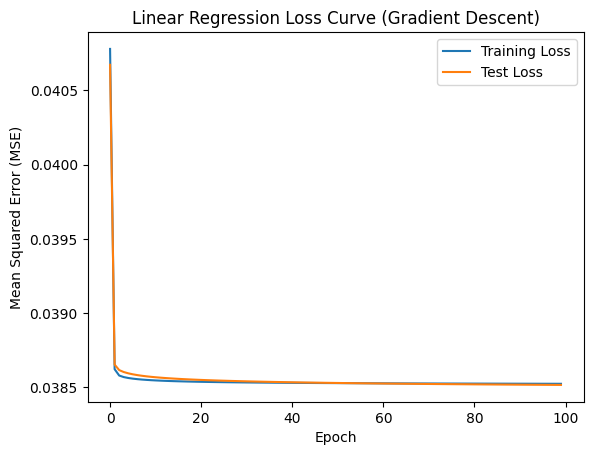

In [187]:
# Lists to store losses
train_losses = []
test_losses = []

# Partial fit the model in epochs and record losses
for epoch in range(100):  # Example: 100 epochs
    model.partial_fit(X_train_scaled, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate and store losses
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Linear Regression Loss Curve (Gradient Descent)')
plt.legend()
plt.show()

In [188]:
tree_model = DecisionTreeRegressor(random_state=64)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=64)

In [189]:
forest_model = RandomForestRegressor(random_state=64)
forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=64)

In [190]:
sgd_predictions = model.predict(X_test_scaled)  # Predictions from Linear Regression (model you trained earlier)
tree_predictions = tree_model.predict(X_test_scaled)
forest_predictions = forest_model.predict(X_test_scaled)

In [191]:
sgd_mse = mean_squared_error(y_test, sgd_predictions)

tree_mse = mean_squared_error(y_test, tree_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)

sgd_r2 = r2_score(y_test, sgd_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

print("Linear Regression (Gradient Descent) - MSE:", sgd_mse, "R-squared:", sgd_r2)
print("Decision Tree - MSE:", tree_mse, "R-squared:", tree_r2)
print("Random Forest - MSE:", forest_mse, "R-squared:", forest_r2)

Linear Regression (Gradient Descent) - MSE: 0.03851727791492856 R-squared: 0.9542594855218488
Decision Tree - MSE: 0.11681973276384083 R-squared: 0.8612727854335932
Random Forest - MSE: 0.05439504677743223 R-squared: 0.9354041209724604


In [192]:
def find_best_model(models, X_test, y_test):

    results = {}
    for model_name, model in models.items():
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        results[model_name] = {'MSE': mse, 'R-squared': r2}

    # Find the model with the lowest MSE and highest R-squared
    best_model_name = min(results, key=lambda k: (results[k]['MSE'], -results[k]['R-squared']))
    best_model = models[best_model_name]

    return best_model_name, best_model, results

In [193]:
models = {
       'Linear Regression (Gradient Descent)': model,
       'Decision Tree': tree_model,
       'Random Forest': forest_model,
   }

In [194]:
best_model_name, best_model, results = find_best_model(models, X_test_scaled, y_test)  # Use scaled data if applicable

In [195]:
print("Best Model:", best_model)
print("Best Model Name:", best_model_name)
print("Evaluation Metrics:", results)


Best Model: SGDRegressor(random_state=64)
Best Model Name: Linear Regression (Gradient Descent)
Evaluation Metrics: {'Linear Regression (Gradient Descent)': {'MSE': 0.03851727791492856, 'R-squared': 0.9542594855218488}, 'Decision Tree': {'MSE': 0.11681973276384083, 'R-squared': 0.8612727854335932}, 'Random Forest': {'MSE': 0.05439504677743223, 'R-squared': 0.9354041209724604}}


In [197]:
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']